In [1]:
#I have been given a dataframe of 5000 songs by Moosic (Moosic is a little start up that creates 
#curated playlists done by music experts and specialists in old and new trends). My task is to categorize 
#these songs into different playlists using UML's Kmeans Agorithim

#First step=Data exploration and preparation


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('df_audio_features_5000')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5235 entries, 0 to 5234
Data columns (total 18 columns):
 #   Column                                                                                                                                                                             Non-Null Count  Dtype  
---  ------                                                                                                                                                                             --------------  -----  
 0   name                                                                                                                                                                               5235 non-null   object 
 1   artist                                                                                                                                                                             5235 non-null   object 
 2   danceability                                            

In [5]:
df=df.dropna()

In [6]:
df.head(4)

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html
0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,0.658,0.2590,11,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376,,256213,4,1n7JnwviZ7zf0LR1tcGFq7,https://open.spotify.com/track/1n7JnwviZ7zf0LR...
1,Saudade De Bahia ...,Antônio Carlos Jobim,0.742,0.3990,2,-12.646,1,0.0346,0.217,0.000002,0.107,0.693,125.039,,191867,4,5QGM1U0eCYrQuwSJwTm5Zq,https://open.spotify.com/track/5QGM1U0eCYrQuwS...
2,"Canta Canta, Minha Gente ...",Martinho Da Vila,0.851,0.7300,2,-11.048,1,0.3470,0.453,0.000063,0.124,0.905,93.698,,152267,4,0NLIFSZxPzQhCwnkn5PJYs,https://open.spotify.com/track/0NLIFSZxPzQhCwn...
3,Mulher Eu Sei ...,Chico César,0.705,0.0502,4,-18.115,1,0.0471,0.879,0.000041,0.386,0.524,106.802,,186227,4,3mXqOdlLE1k67WsAxryPFs,https://open.spotify.com/track/3mXqOdlLE1k67Ws...


In [7]:
df.drop_duplicates()
df.head(2)

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html
0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,0.658,0.259,11,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376,,256213,4,1n7JnwviZ7zf0LR1tcGFq7,https://open.spotify.com/track/1n7JnwviZ7zf0LR...
1,Saudade De Bahia ...,Antônio Carlos Jobim,0.742,0.399,2,-12.646,1,0.0346,0.217,0.000002,0.107,0.693,125.039,,191867,4,5QGM1U0eCYrQuwSJwTm5Zq,https://open.spotify.com/track/5QGM1U0eCYrQuwS...


In [8]:
df.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['name                                                                                                                                                                             ',
       'artist                                          ', 'danceability ',
       'energy   ', 'key ', 'loudness ', 'mode ', 'speechiness ',
       'acousticness ', 'instrumentalness ', 'liveness ', 'valence ',
       'tempo   ', 'type ', 'duration_ms ', 'time_signature ',
       'id                     ', 'html'],
      dtype='object')>

In [9]:
df.rename(columns={'artist                                          ':'artist', 'danceability ':'danceability',
       'energy   ':'energy', 'key ':'key', 'loudness ':'loudness', 'mode ':'mode', 'speechiness ':'speechiness',
       'acousticness ':'acousticness', 'instrumentalness ':'instrumentalness', 'liveness ':'liveness', 'valence ':'valence',
       'tempo   ':'tempo', 'type ':'type', 'duration_ms ':'duration_ms', 'time_signature ':'time_signature',
       'id                     ':'id', 'html':'html'}, inplace = True  )
df.head(2)


,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html
0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,0.658,0.259,11,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376,,256213,4,1n7JnwviZ7zf0LR1tcGFq7,https://open.spotify.com/track/1n7JnwviZ7zf0LR...
1,Saudade De Bahia ...,Antônio Carlos Jobim,0.742,0.399,2,-12.646,1,0.0346,0.217,0.000002,0.107,0.693,125.039,,191867,4,5QGM1U0eCYrQuwSJwTm5Zq,https://open.spotify.com/track/5QGM1U0eCYrQuwS...


In [10]:
df.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['name                                                                                                                                                                             ',
       'artist', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'duration_ms', 'time_signature', 'id',
       'html'],
      dtype='object')>

In [11]:
#penguins.drop(['species','island','sex'], axis=1, inplace=True)
df.drop(df.columns[[12, 13, 14, 16, 17]], axis=1, inplace=True)


In [12]:
df.drop(df.columns[[-1]], axis=1, inplace=True)

In [13]:
df.head(5)

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence
0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,0.658,0.2590,11,-13.141,0,0.0705,0.694,0.000059,0.975,0.306
1,Saudade De Bahia ...,Antônio Carlos Jobim,0.742,0.3990,2,-12.646,1,0.0346,0.217,0.000002,0.107,0.693
2,"Canta Canta, Minha Gente ...",Martinho Da Vila,0.851,0.7300,2,-11.048,1,0.3470,0.453,0.000063,0.124,0.905
3,Mulher Eu Sei ...,Chico César,0.705,0.0502,4,-18.115,1,0.0471,0.879,0.000041,0.386,0.524
4,Rosa Morena ...,Kurt Elling,0.651,0.1190,6,-19.807,1,0.0380,0.916,0.000343,0.104,0.402


In [14]:
df_play_lists=df

In [15]:
df_play_lists.to_csv('df_play_lists', header=False, index=False)

In [16]:
df_play_lists.head(4)

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence
0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,0.658,0.2590,11,-13.141,0,0.0705,0.694,0.000059,0.975,0.306
1,Saudade De Bahia ...,Antônio Carlos Jobim,0.742,0.3990,2,-12.646,1,0.0346,0.217,0.000002,0.107,0.693
2,"Canta Canta, Minha Gente ...",Martinho Da Vila,0.851,0.7300,2,-11.048,1,0.3470,0.453,0.000063,0.124,0.905
3,Mulher Eu Sei ...,Chico César,0.705,0.0502,4,-18.115,1,0.0471,0.879,0.000041,0.386,0.524


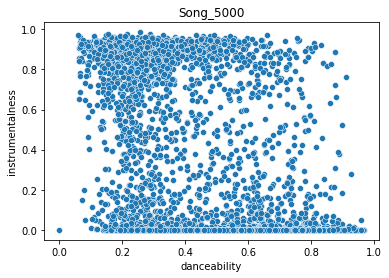

In [17]:
plt.title('Song_5000')
sns.scatterplot(data=df_play_lists, x='danceability', y='instrumentalness')
plt.show()

In [18]:
#Second step= Data Modelling:

#Data Scaling

In [19]:
df_list_features = df_play_lists[['danceability','instrumentalness']]

In [20]:
df_list_features.head(4)

,danceability,instrumentalness
0,0.658,0.000059
1,0.742,0.000002
2,0.851,0.000063
3,0.705,0.000041


In [21]:
#from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler() -> Transform features by scaling each feature to a given range; default is between 0 and 1. 
# .fit_transform() -> fit finds the minimum and the maximum and transform will change your data in regard to the fit values.
#df_list_features_c = MinMaxScaler().fit_transform(df_list_features)

In [22]:
from sklearn.preprocessing import StandardScaler

df_list_features_sn = StandardScaler().fit_transform(df_list_features)

In [23]:
df_list_features_sn

array([[ 0.6811158 , -0.69412469],
       [ 1.06640121, -0.69427799],
       [ 1.56635489, -0.69411201],
       ...,
       [-2.06358405,  1.92003714],
       [-1.72691799,  0.66818515],
       [-0.71325043,  0.61152806]])

In [24]:
#What data type is df_list_features_c? Note: remember that you can use type() to check this.

In [25]:
type(df_list_features_sn)

numpy.ndarray

In [26]:
#let's see the first 5 observations after normalising the data
df_list_features_sn = pd.DataFrame(df_list_features_sn) #turn it back into a dataframe
df_list_features_sn.columns = ['danceability','instrumentalness']
df_list_features_sn[:3]

,danceability,instrumentalness
0,0.681116,-0.694125
1,1.066401,-0.694278
2,1.566355,-0.694112


In [27]:
#K-Means exploration of clusters (elbow method)

In [28]:
from sklearn.cluster import KMeans
song_KMeans = KMeans(n_clusters=50)
song_KMeans.fit(df_list_features_sn)
song_KMeans.inertia_

72.69426154008825

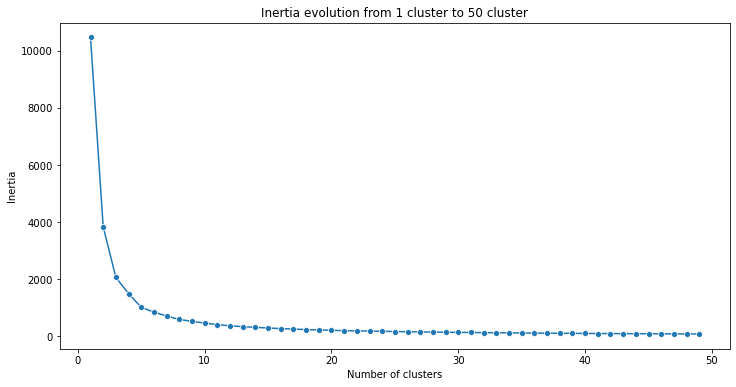

In [29]:
max_k = 50
inertia = []

for k in range(1, max_k): 
    inertia.append(KMeans(n_clusters=k).fit(df_list_features_sn).inertia_)

fig, ax = plt.subplots(figsize=(12, 6))
plt.title(f'Inertia evolution from 1 cluster to {max_k} cluster')
sns.lineplot(x=range(1, max_k), y=inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [30]:
#K-means modelling

from sklearn.cluster import KMeans




In [31]:
song_kmeans = KMeans(n_clusters=10).fit(df_list_features_sn)  # Compute k-means clustering
song_kmeans

KMeans(n_clusters=10)

In [32]:
song_kmeans.cluster_centers_

array([[ 0.29830312, -0.6446411 ],
       [-0.94355669,  1.66974317],
       [ 0.86241165, -0.6663148 ],
       [-0.34555853, -0.61809298],
       [-0.08081225,  1.62752064],
       [-1.56542464,  1.63105168],
       [-1.10272568,  0.62509493],
       [ 0.82718771,  1.12112742],
       [-1.190919  , -0.55477102],
       [ 1.45878978, -0.6655055 ]])

In [33]:
df_list_features_kn = pd.DataFrame(song_kmeans.cluster_centers_)
df_list_features_kn.columns = ['danceability','instrumentalness']
df_list_features_kn

,danceability,instrumentalness
0,0.298303,-0.644641
1,-0.943557,1.669743
2,0.862412,-0.666315
3,-0.345559,-0.618093
4,-0.080812,1.627521
5,-1.565425,1.631052
6,-1.102726,0.625095
7,0.827188,1.121127
8,-1.190919,-0.554771
9,1.458790,-0.665506


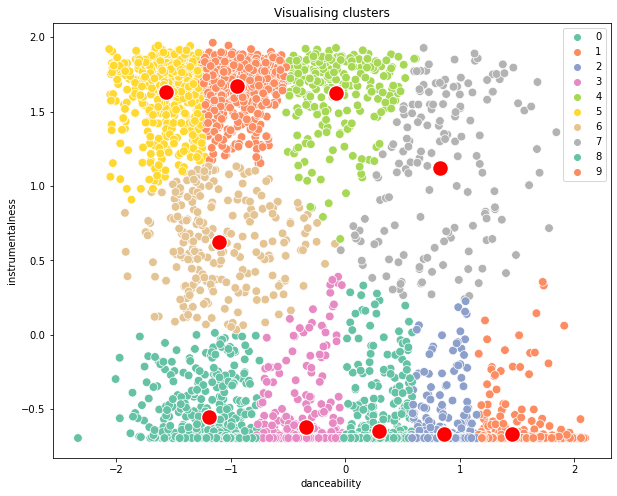

In [34]:
# size and plot titles
fig, ax = plt.subplots(figsize=(10, 8))
plt.title('Visualising clusters')
plt.xlabel('danceability')
plt.ylabel('instrumentalness')

# create plot dataframe
plot_data = pd.DataFrame(df_list_features_sn)
plot_data.columns =['danceability','instrumentalness']
plot_data['cluster'] = song_kmeans.labels_

# scatter plot
sns.scatterplot(data=plot_data,  x='danceability', y='instrumentalness', hue='cluster', palette='Set2', s=75)
sns.scatterplot(data=df_list_features_kn,  x='danceability', y='instrumentalness', color='red', s=250)
plt.show()




In [ ]:
#with three feature columns and StandardScaler

In [74]:

df_all_features = df_play_lists[['danceability','instrumentalness', 'liveness']]
df_all_features .head()

,danceability,instrumentalness,liveness
0,0.658,0.000059,0.975
1,0.742,0.000002,0.107
2,0.851,0.000063,0.124
3,0.705,0.000041,0.386
4,0.651,0.000343,0.104


In [75]:
#find the no of clusters using inetia  

In [76]:
from sklearn.cluster import KMeans
song_KMeans = KMeans(n_clusters=50)
song_KMeans.fit(df_all_features)
song_KMeans.inertia_

25.15814945017764

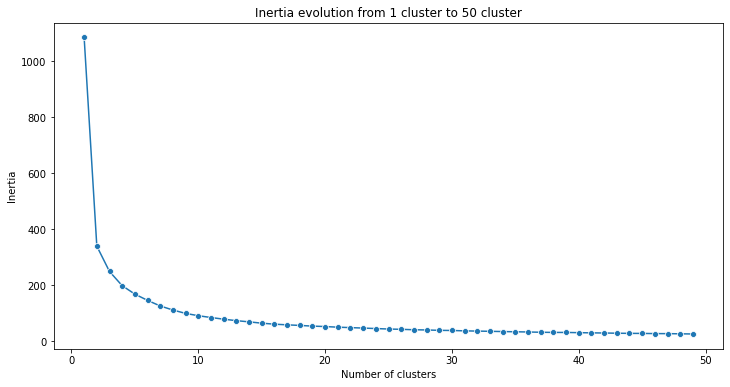

In [77]:
max_k = 50
inertia = []

for k in range(1, max_k): 
    inertia.append(KMeans(n_clusters=k).fit(df_all_features).inertia_)

fig, ax = plt.subplots(figsize=(12, 6))
plt.title(f'Inertia evolution from 1 cluster to {max_k} cluster')
sns.lineplot(x=range(1, max_k), y=inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [78]:
#K-means modelling

In [89]:
from sklearn.preprocessing import StandardScaler

df_all_features_n = StandardScaler().fit_transform(df_all_features)

kmeans_all = KMeans(n_clusters=2)
kmeans_all.fit(df_all_features_n)

KMeans(n_clusters=2)

In [90]:
kmeans_all.cluster_centers_

array([[-0.95199094,  1.41579528, -0.07078385],
       [ 0.41452197, -0.61647461,  0.03082115]])

In [91]:
df_all_features_nn = pd.DataFrame(kmeans_all.cluster_centers_)
df_all_features_nn.columns = ['danceability','instrumentalness', 'liveness']
df_all_features_nn

,danceability,instrumentalness,liveness
0,-0.951991,1.415795,-0.070784
1,0.414522,-0.616475,0.030821


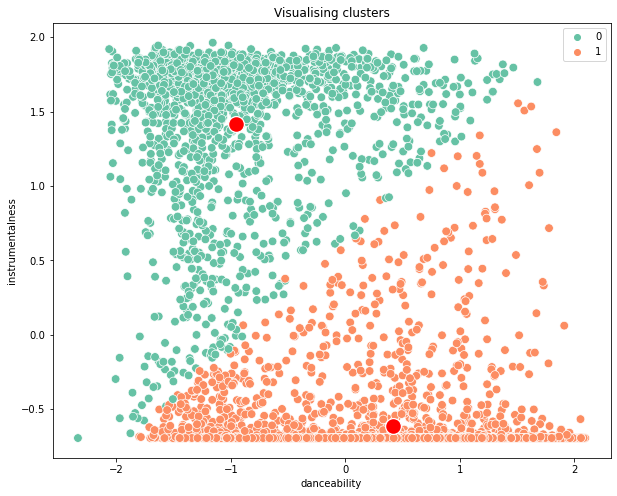

In [92]:
# size and plot titles
fig, ax = plt.subplots(figsize=(10, 8))
plt.title('Visualising clusters')
plt.xlabel('danceability')
plt.ylabel('instrumentalness')

plot_data = pd.DataFrame(df_all_features_n)
plot_data.columns =['danceability','instrumentalness', 'liveness']
plot_data['cluster'] = kmeans_all.labels_

sns.scatterplot(data=plot_data,  x='danceability', y='instrumentalness', hue='cluster', palette='Set2', s=75)
sns.scatterplot(data=df_all_features_nn,  x='danceability', y='instrumentalness', color='red', s=250)
plt.show()

In [93]:
Ploting the clusters in 3d

SyntaxError: invalid syntax (3022951337.py, line 1)

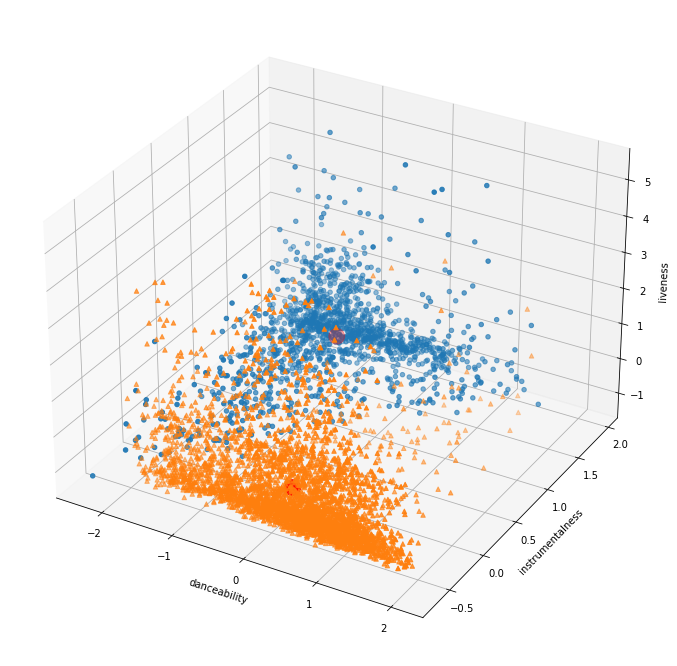

In [97]:
import matplotlib.pyplot as plt
import random
colors = ['r','r']
markers = ['o', '^']
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')


for marker, d in plot_data.groupby('cluster'):
    ax.scatter(d['danceability'], d['instrumentalness'], d['liveness'], marker=markers[marker], label=d['cluster'])
ax.scatter(df_all_features_nn['danceability'], df_all_features_nn['instrumentalness'],df_all_features_nn['liveness'], color='red', s=250)
ax.set_xlabel('danceability')
ax.set_ylabel('instrumentalness')
ax.set_zlabel('liveness')
plt.show()

